In [1]:
# Libraries for numerical computation and visualization
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn tools for modeling and evaluation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set seed for reproducibility
np.random.seed(42)

# Generate input values
X = np.linspace(0, 4 * np.pi, 100).reshape(-1, 1)  # From 0 to 4π

# Generate sinusoidal output with noise
noise = np.random.normal(0, 0.3, size=X.shape)
y = np.sin(X) + noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Train set size: 70, Test set size: 30


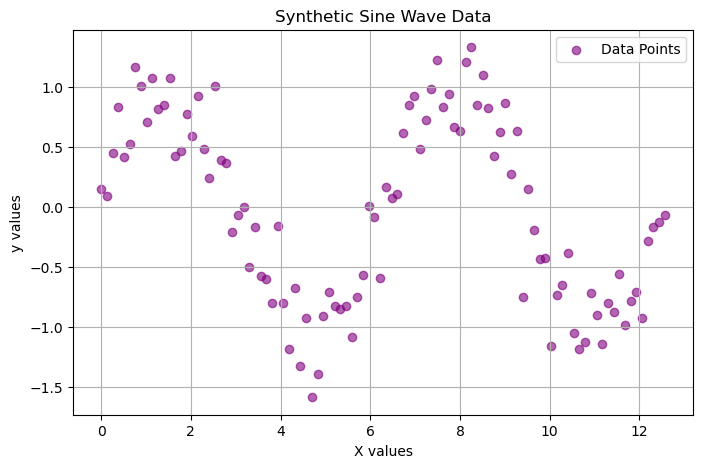

In [2]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='purple', alpha=0.6, label='Data Points')
plt.title('Synthetic Sine Wave Data')
plt.xlabel('X values')
plt.ylabel('y values')
plt.grid(True)
plt.legend()
plt.show()


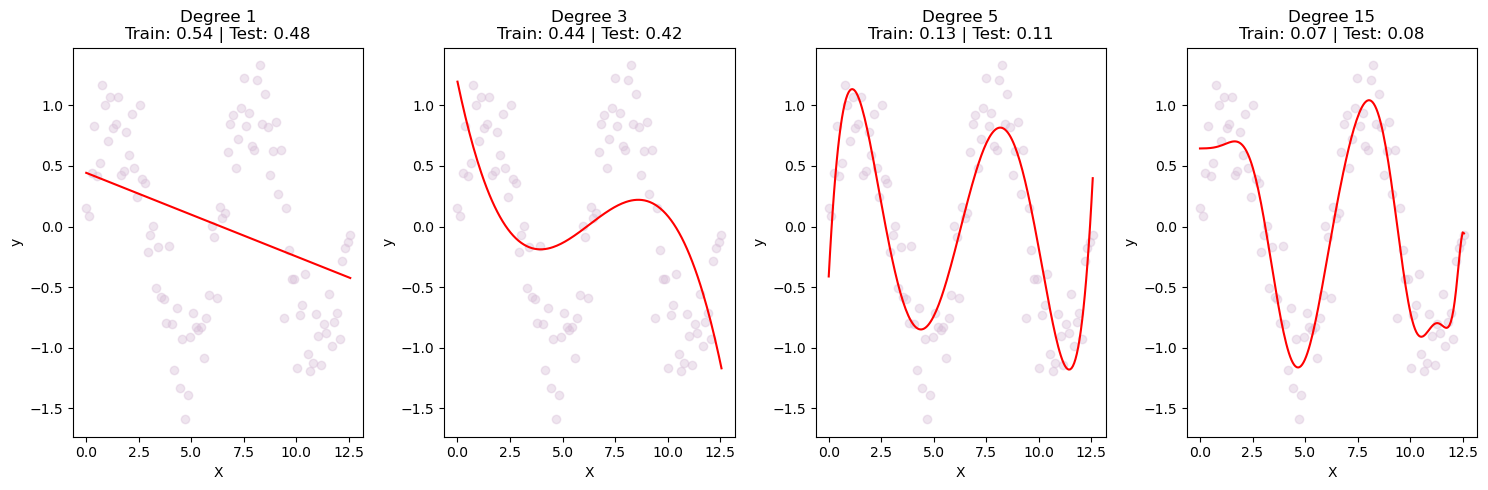

In [8]:
degrees = [1, 3, 5, 15]
plt.figure(figsize=(15, 5))

for idx, degree in enumerate(degrees):
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linreg', LinearRegression())
    ])
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_err = mean_squared_error(y_train, y_train_pred)
    test_err = mean_squared_error(y_test, y_test_pred)

    plt.subplot(1, len(degrees), idx + 1)
    plt.scatter(X, y, color='#D8BFD8', alpha=0.4)
    X_plot = np.linspace(0, 4 * np.pi, 200).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, color='red')
    plt.title(f'Degree {degree}\nTrain: {train_err:.2f} | Test: {test_err:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')

plt.tight_layout()
plt.show()


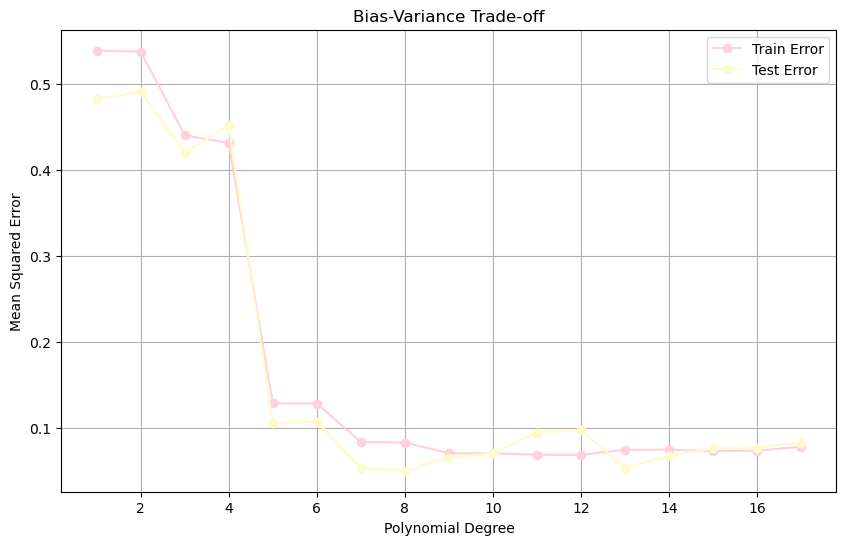

In [6]:
train_errors = []
test_errors = []
degrees = range(1, 18)

for d in degrees:
    model = Pipeline([
        ('poly', PolynomialFeatures(d)),
        ('linreg', LinearRegression())
    ])
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

# Plot with soft yellow and soft pink
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o', color='#FFD1DC')  # Soft Pink
plt.plot(degrees, test_errors, label='Test Error', marker='o', color='#FFFACD')    # Soft Yellow
plt.title('Bias-Variance Trade-off')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()
